<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>

### 1. Exploratory Data Analysis
### 2. Data Modelling and Evaluation
----

---
----
<font size="+3" color='#053c96'><b> EDA </b> </font>

---
---

## Import Necssaries Libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set_context('notebook')

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Import Dataset

In [6]:
df = pd.read_csv(r'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
print(f"Data has: {df.shape[0]} rows\nData has: {df.shape[1]} columns")

Data has: 1338 rows
Data has: 7 columns


##  Data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Describe Data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- 75% or more of the charges column are <= 16639.912515

- only 25% or lees of the charges column are >= 16639.912515 

- maximum value charges column are 63770.42801 

In [13]:
len(df[df.charges>48000])

16

In [14]:
df_nulls=pd.DataFrame(df.isnull().sum(),columns=['Number of null'])
df_nulls['percentage %']=(df.isnull().sum())/len(df)*100
df_nulls

,Number of null,percentage %
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


- Data is clean of missing values.

In [16]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
df_duplicated = df[df.duplicated(keep='last')==True]

df_duplicated.head()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [18]:
print(f"Data has: {len(df_duplicated)} rows")

Data has: 1 rows


In [19]:
df.drop_duplicates(inplace=True)

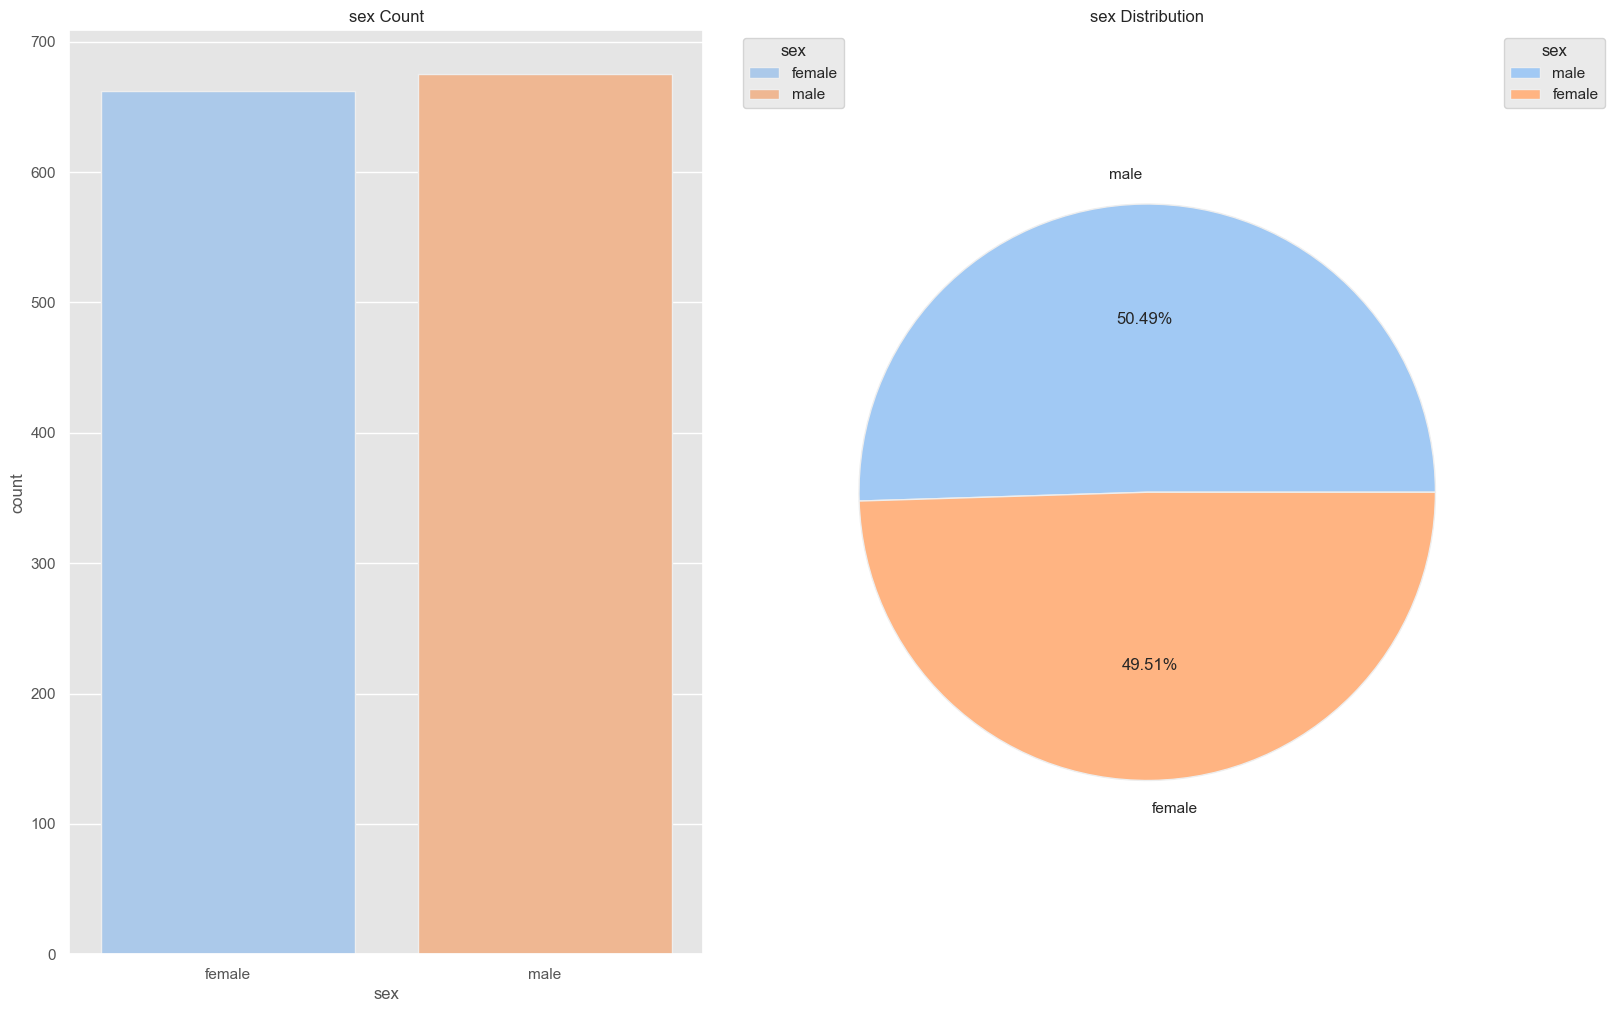

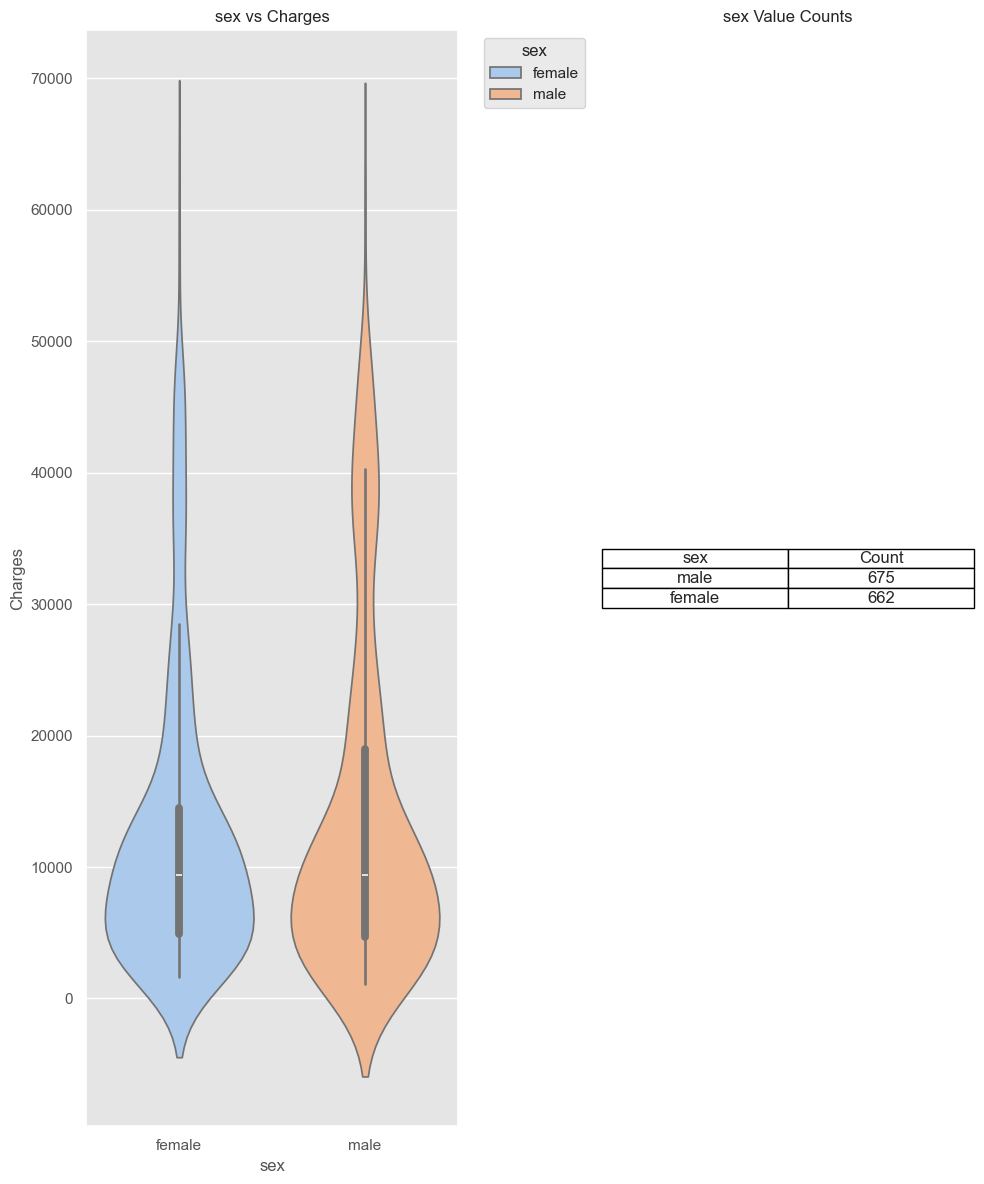


sex
male      675
female    662
Name: count, dtype: int64



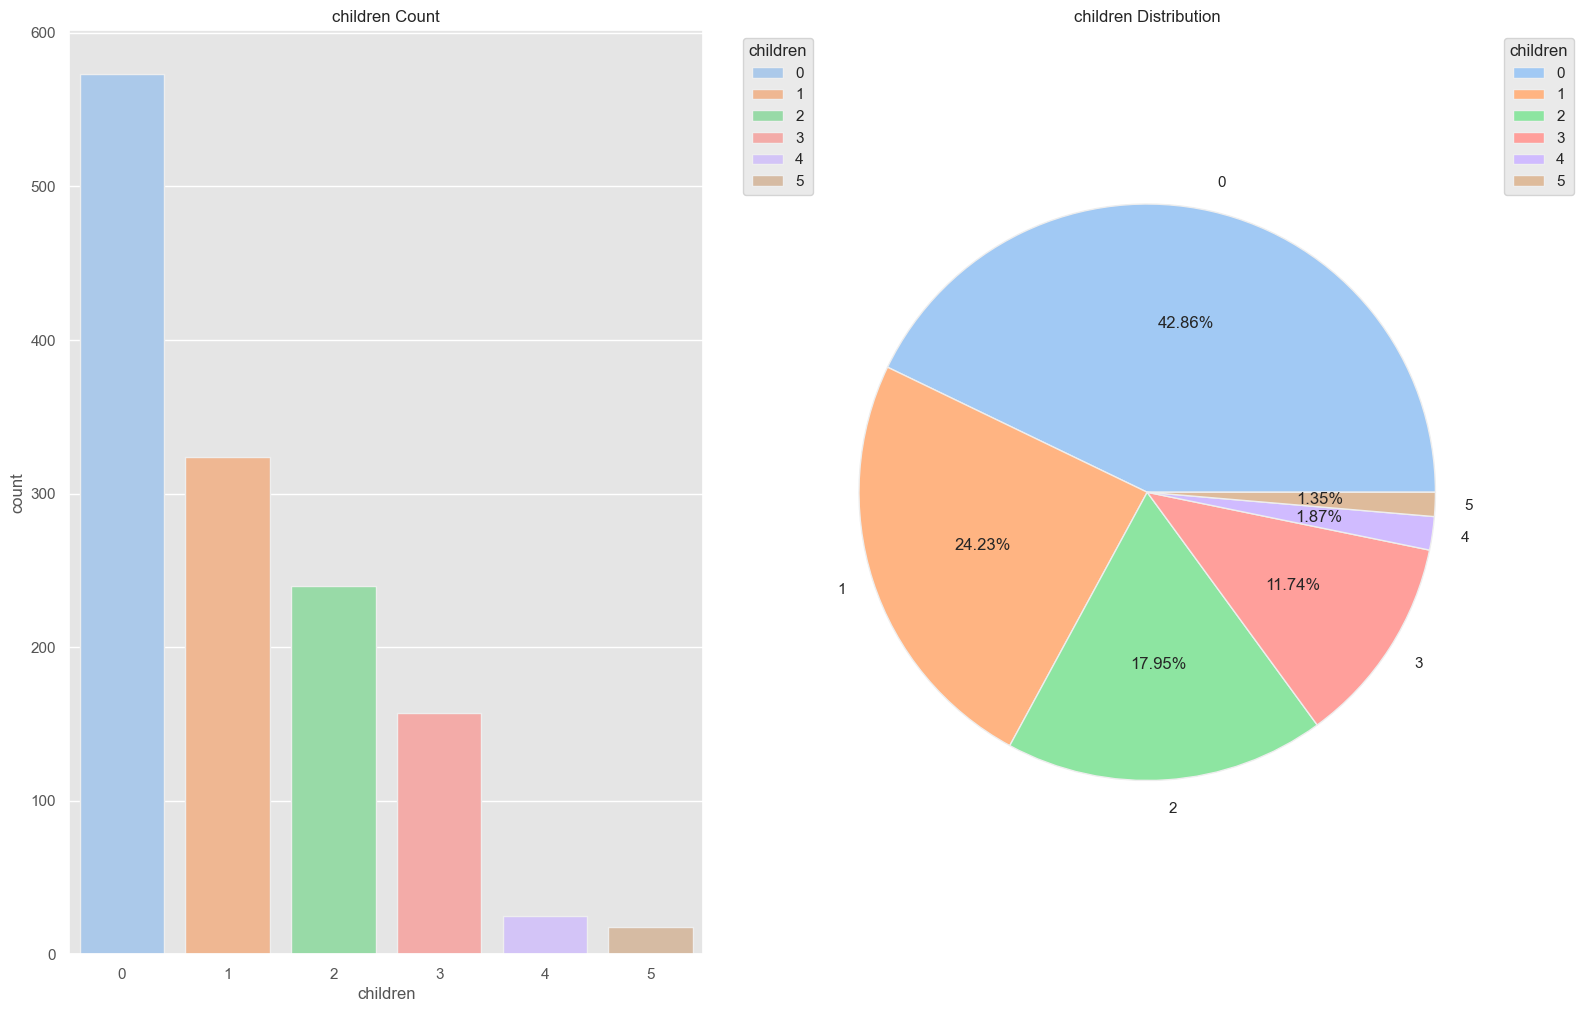

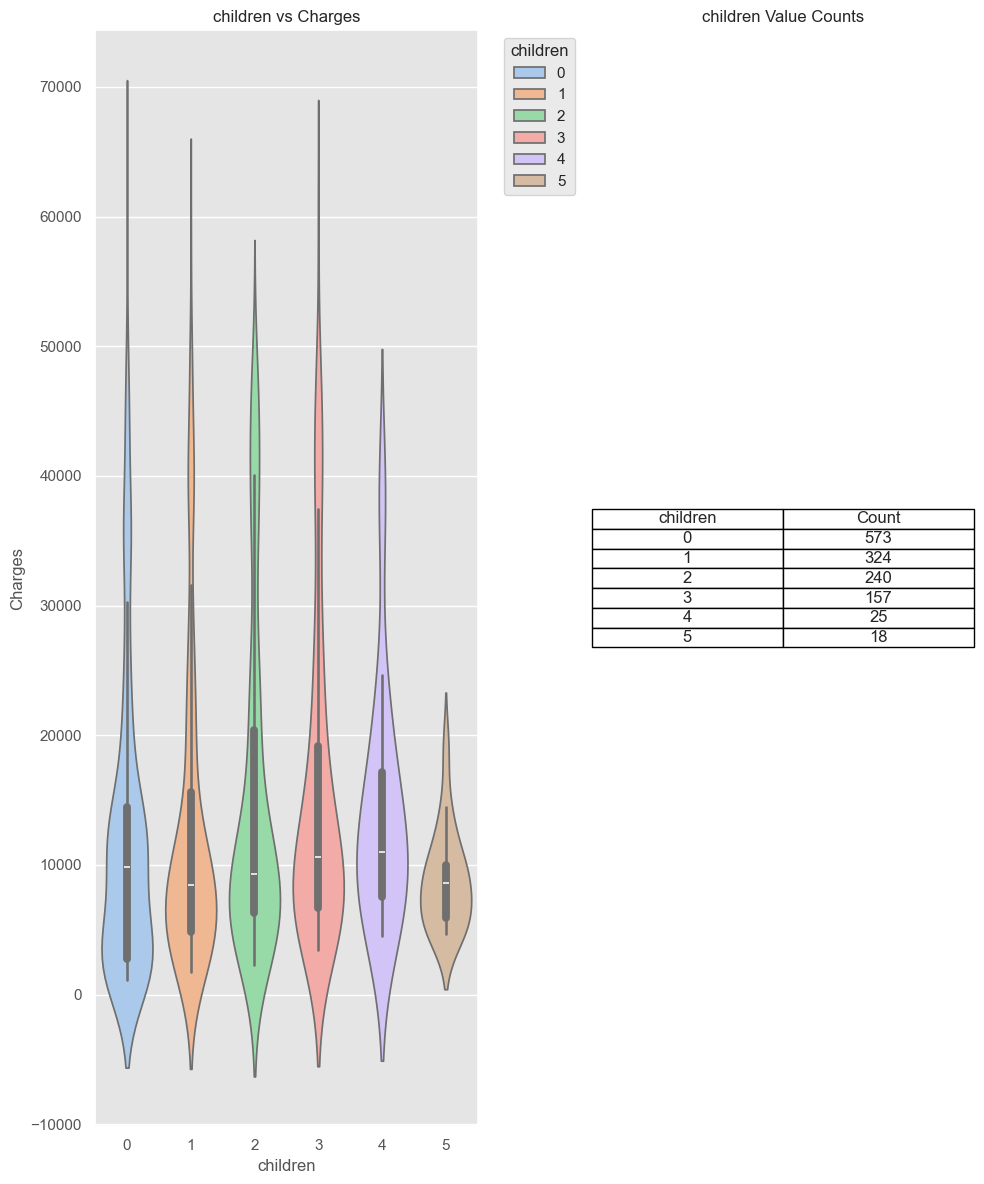


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64



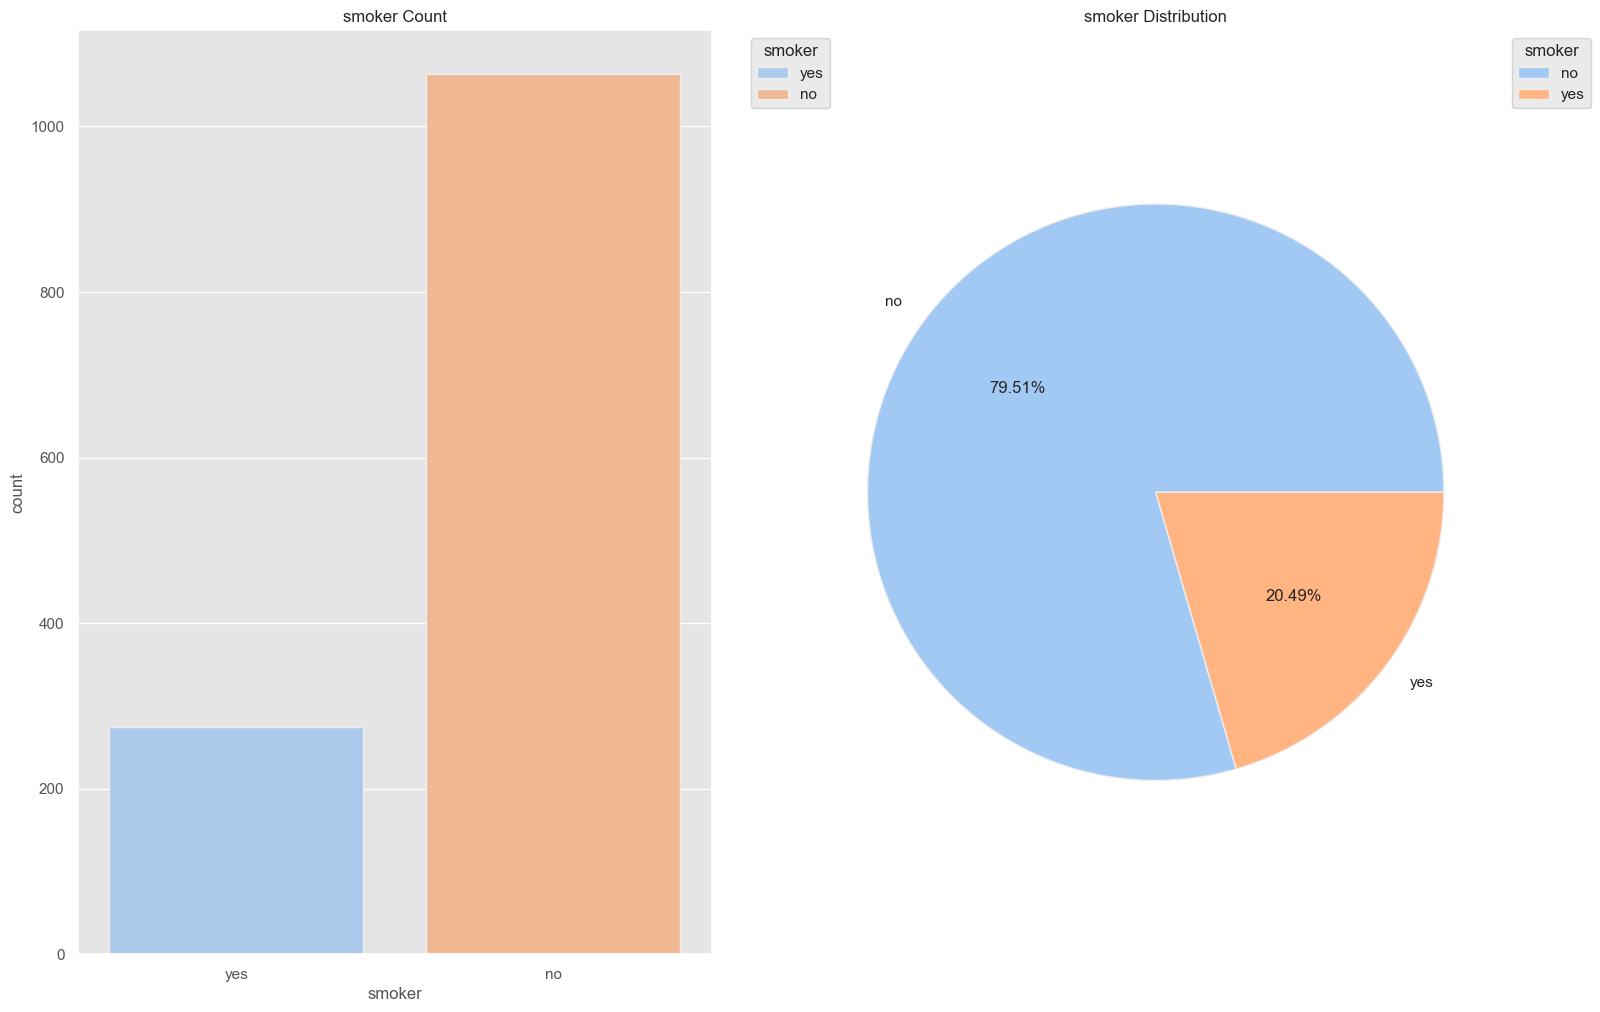

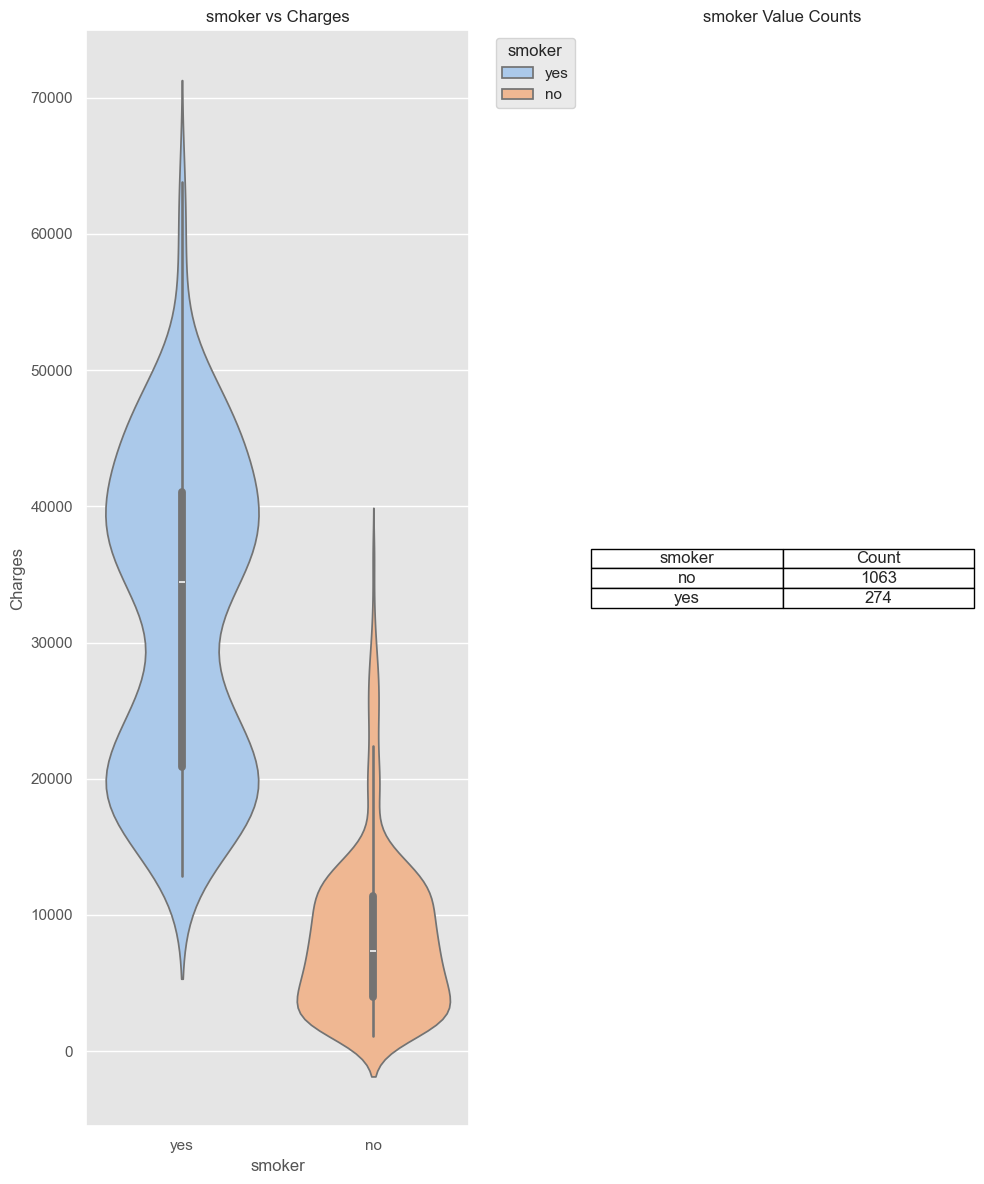


smoker
no     1063
yes     274
Name: count, dtype: int64



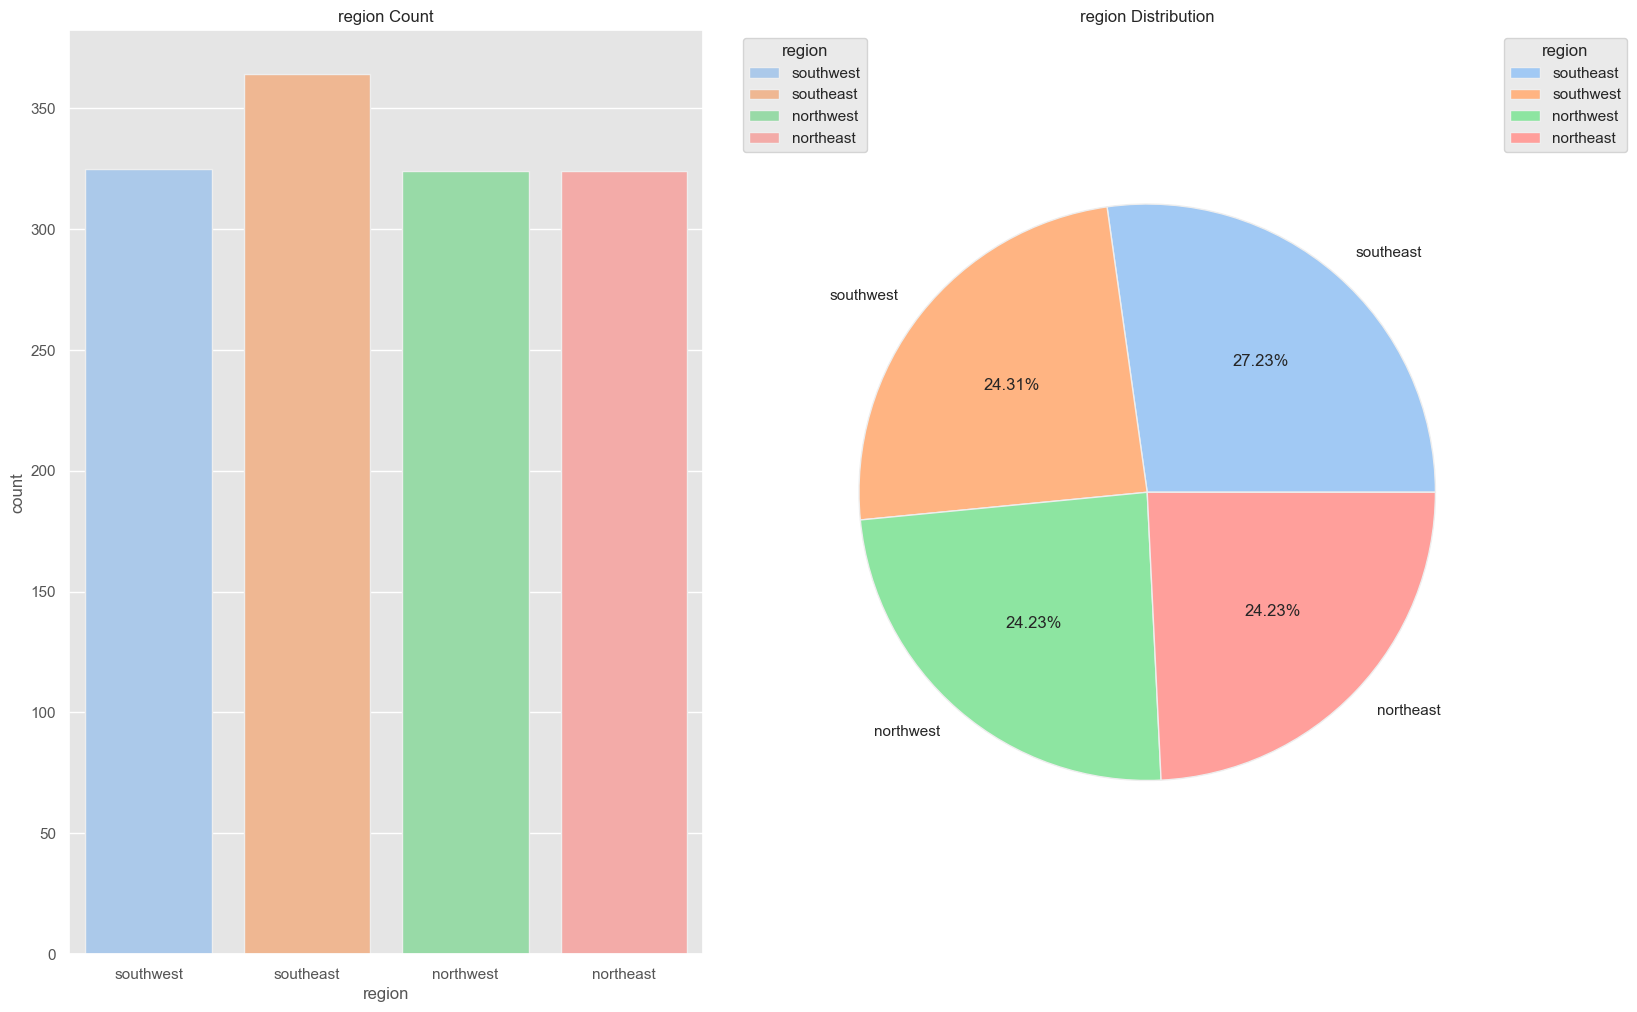

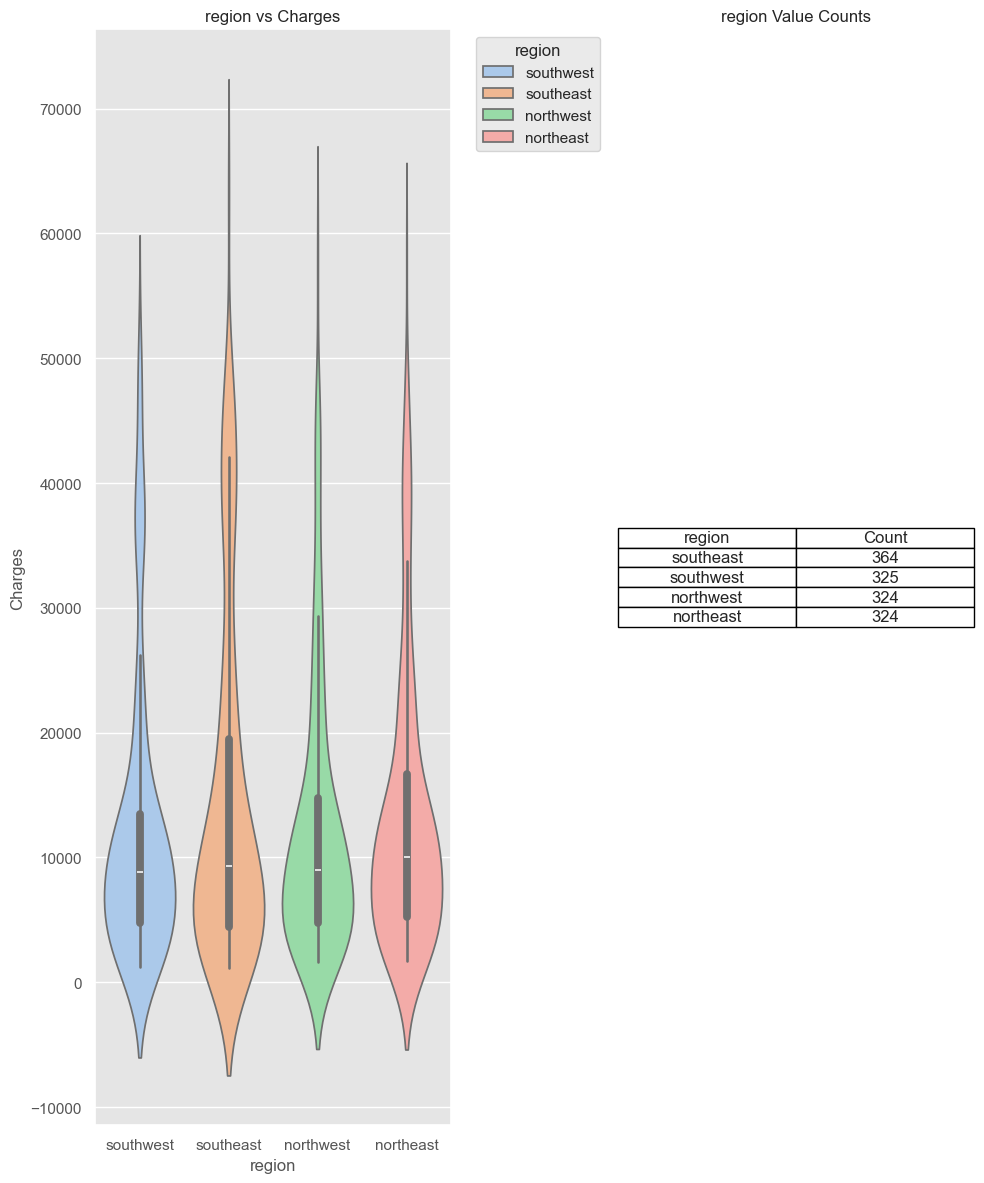


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



In [20]:
cat_df = df[['sex','children','smoker','region']]

for i in cat_df:
    plt.figure(figsize=(18,12))
    plt.subplot(1,2,1)
    plt.title(f"{i} Count")
    sns.countplot(x=i, data=df ,hue=i, palette='pastel', legend=True)
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left')

    
    plt.subplot(1,2,2)
    plt.pie(x=df[i].value_counts(),
            labels = df[i].value_counts().index,
            colors=sns.color_palette("pastel"), autopct='%.02f%%')
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"{i} Distribution")
    plt.axis('equal') 

    plt.figure(figsize=(10, 12))
    plt.subplot(1,2,2)
    table_df = pd.DataFrame(df[i].value_counts()).reset_index()
    table_df.columns = [i, 'Count']
    plt.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')
    plt.axis('off')  # إخفاء المحاور
    plt.title(f"{i} Value Counts")

    plt.subplot(1,2,1)
    sns.violinplot(x=i, y=df['charges'], data=df, hue=i, palette='pastel',legend=True )
    plt.title(f"{i} vs Charges")
    plt.xlabel(i)
    plt.ylabel("Charges")
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left')
   
  
    plt.tight_layout()    
    plt.show()

    print(f"\n{'='*50}\n{df[i].value_counts()}\n{'='*50}\n")


- non-smokers and pepole with no childern have the majority in the dataset
sex and regions are pretty equal

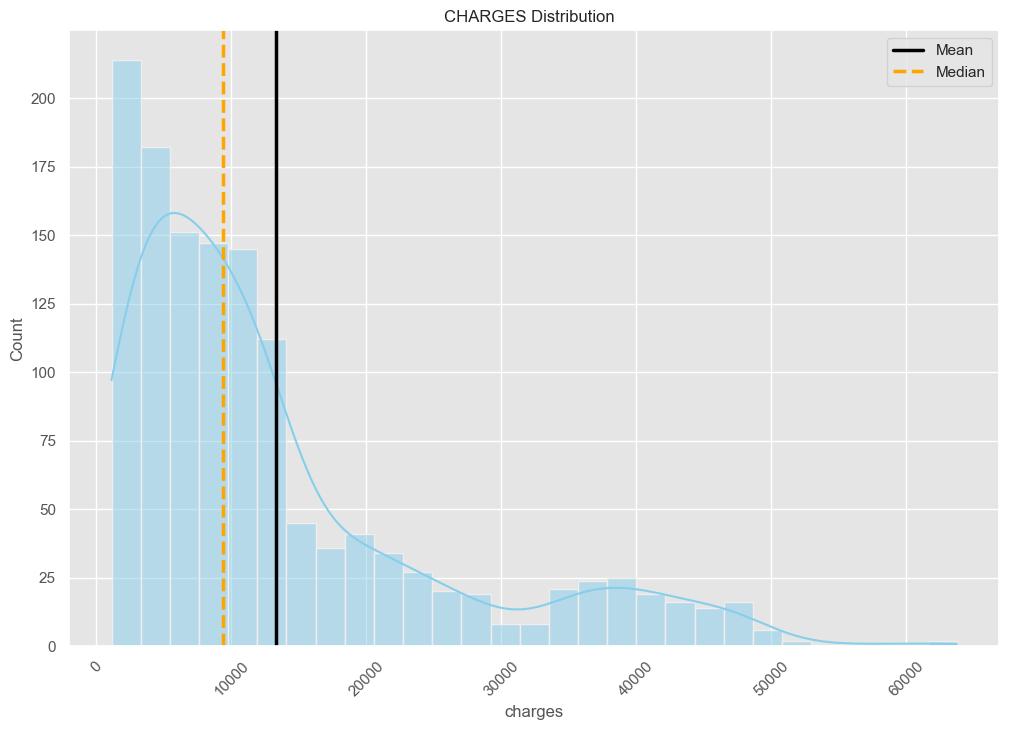

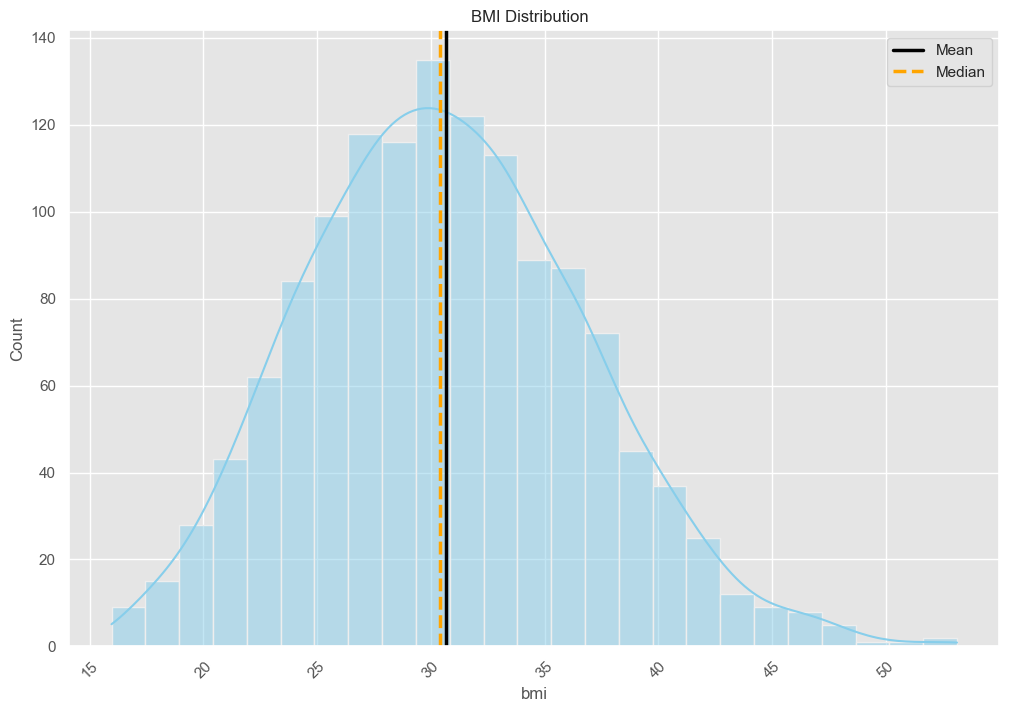

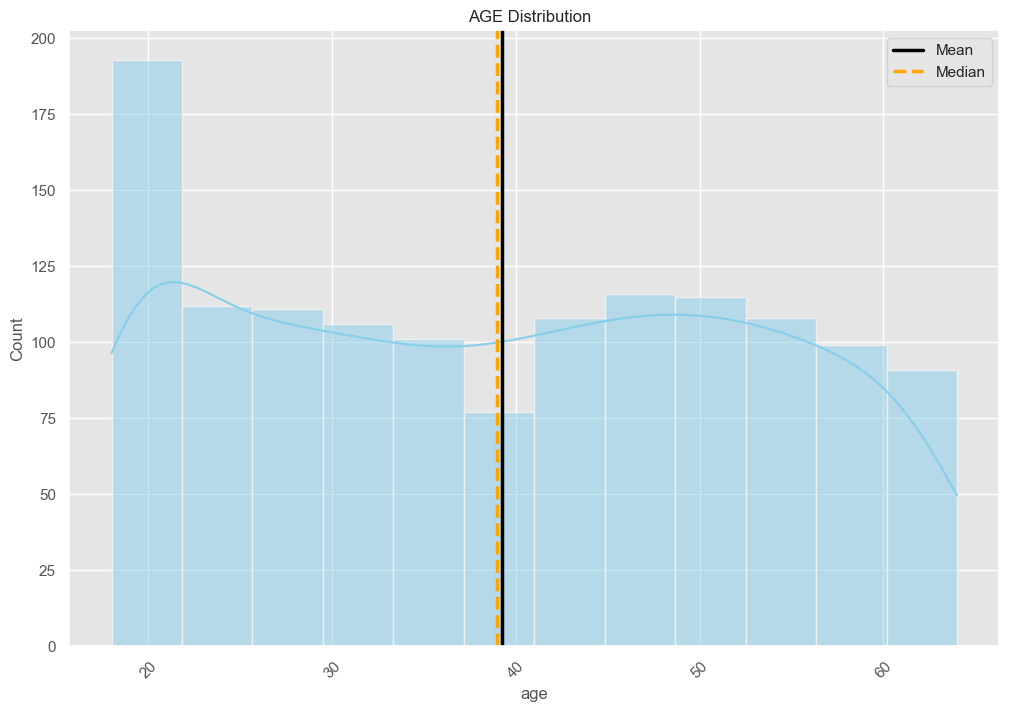

In [22]:
num_df = df[['charges','bmi','age']]
for i  in num_df:
    
    plt.figure(figsize=(12,8))
    plt.title(f'{str(i).upper()} Distribution  ')
    sns.histplot(df[i], kde=True, color='skyblue')
    plt.xlabel(i)
    plt.xticks(rotation=45)
    plt.axvline(df[i].mean(), c='k', ls='-', lw=2.5, label='Mean')
    plt.axvline(df[i].median(), c='orange', ls='--', lw=2.5, label='Median')
    plt.legend()
    plt.show()
    

<Axes: xlabel='region', ylabel='charges'>

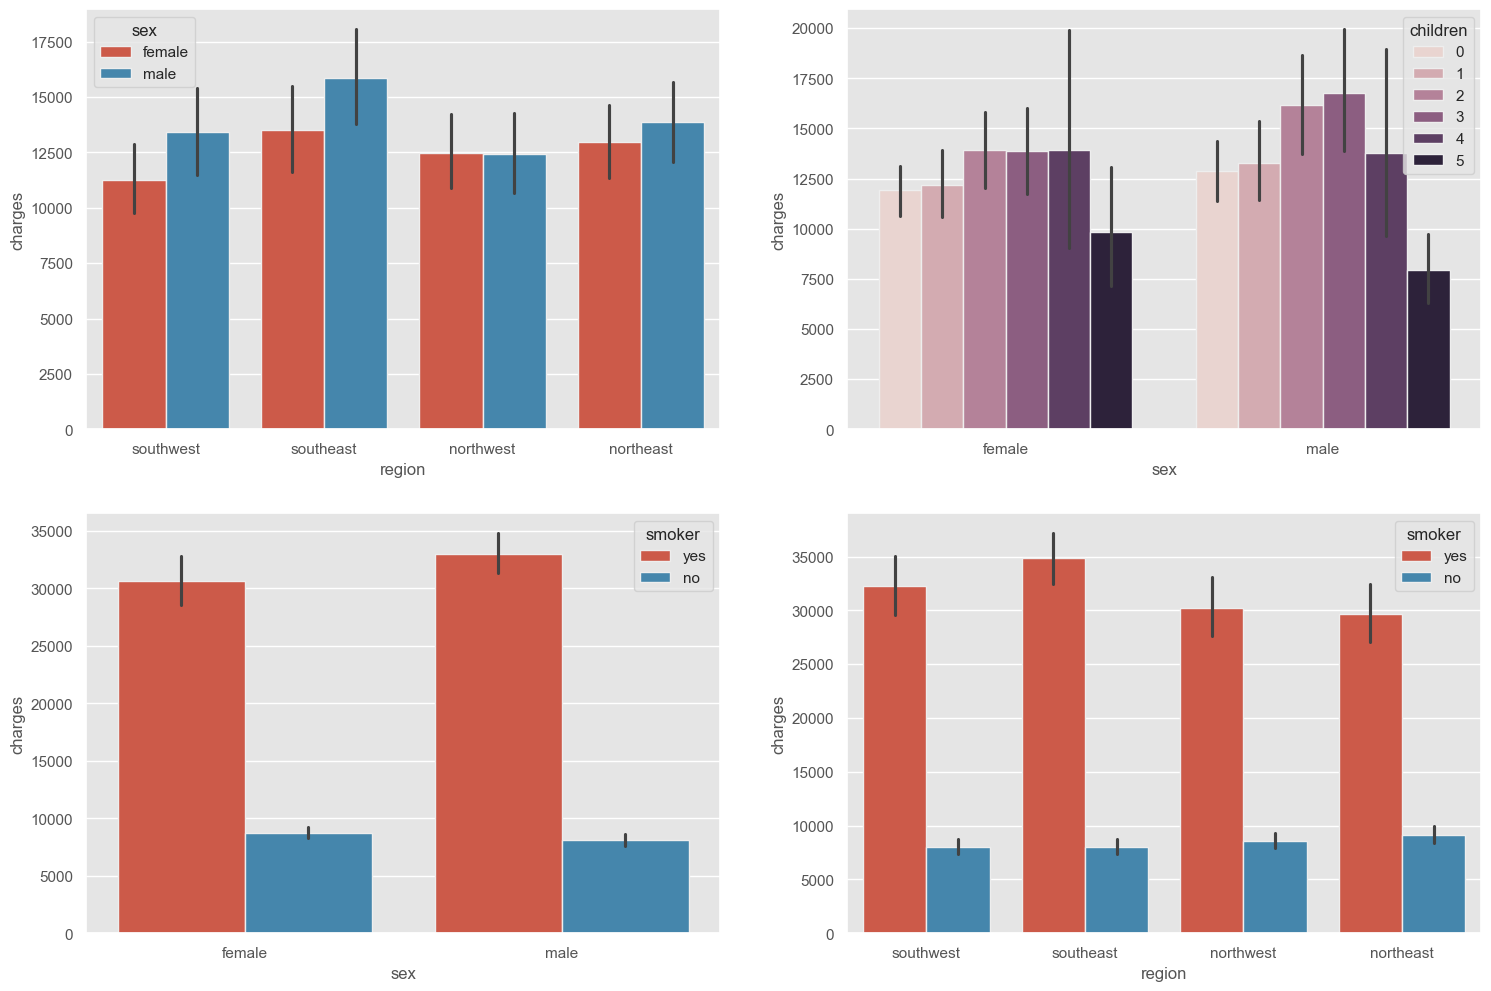

In [23]:

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.barplot(x='region', y='charges', hue='sex', data=df)

plt.subplot(2,2,2)
sns.barplot(x='sex', y='charges', hue='children', data=df)

plt.subplot(2,2,3)
sns.barplot(x='sex', y='charges', hue='smoker', data=df)

plt.subplot(2,2,4)
sns.barplot(x='region', y='charges', hue='smoker', data=df)

-  southeast males pays more charges
-   males with 2,3 childrens pays more charges
-   smokers clearly pay ways more than non smokers
-   southeast smokers pays the most

<Axes: xlabel='region', ylabel='charges'>

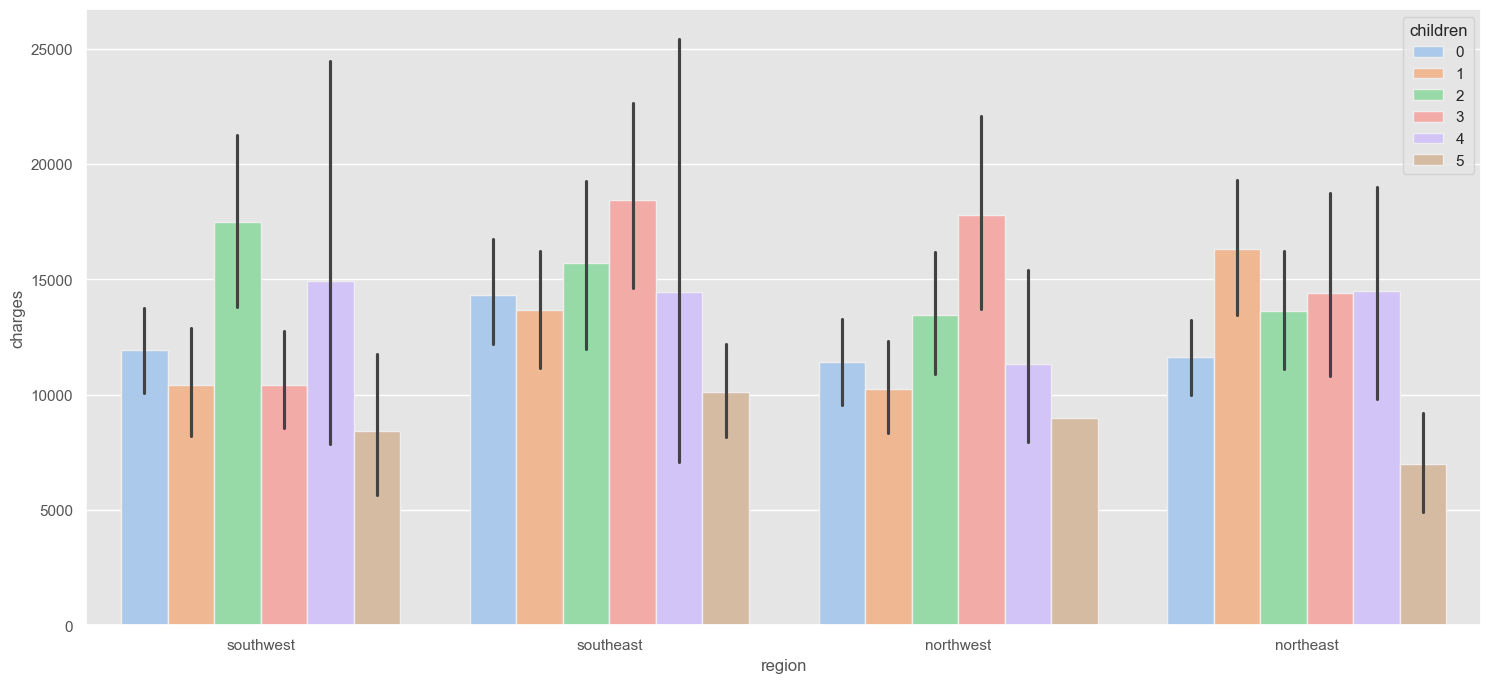

In [25]:

plt.subplots(1, 1, figsize=(18, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='pastel')

-  
As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

C:\Users\Mo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

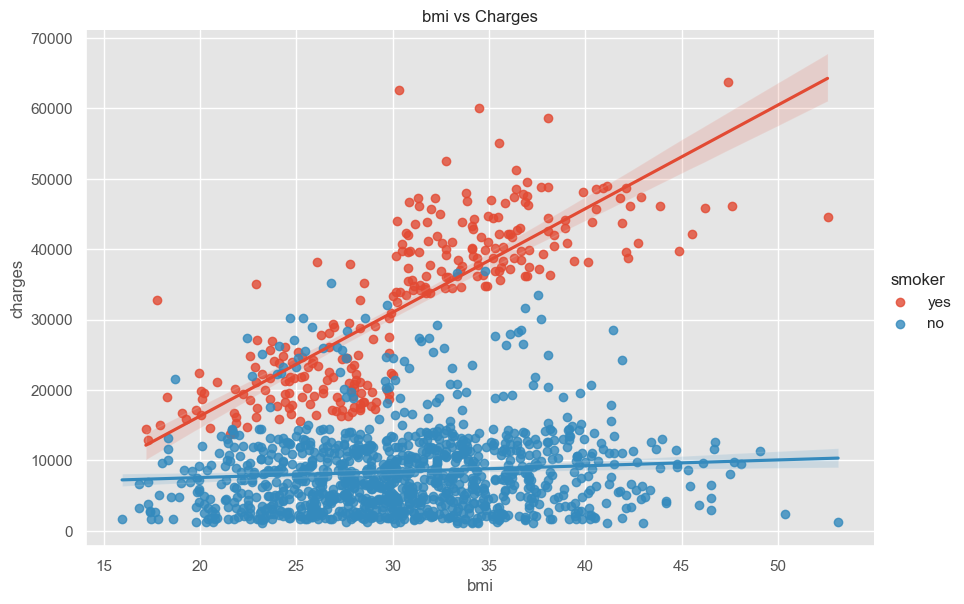

C:\Users\Mo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

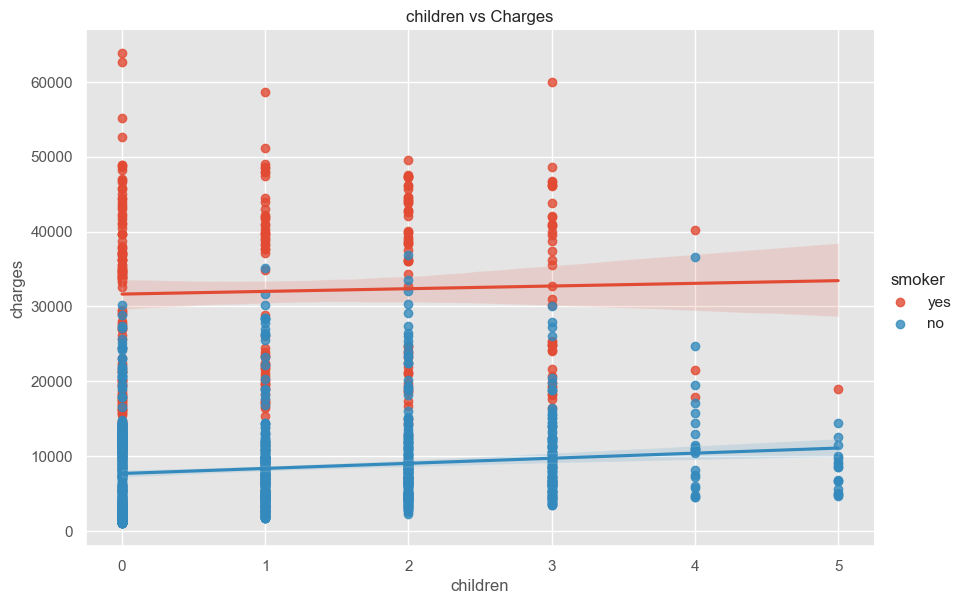

C:\Users\Mo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

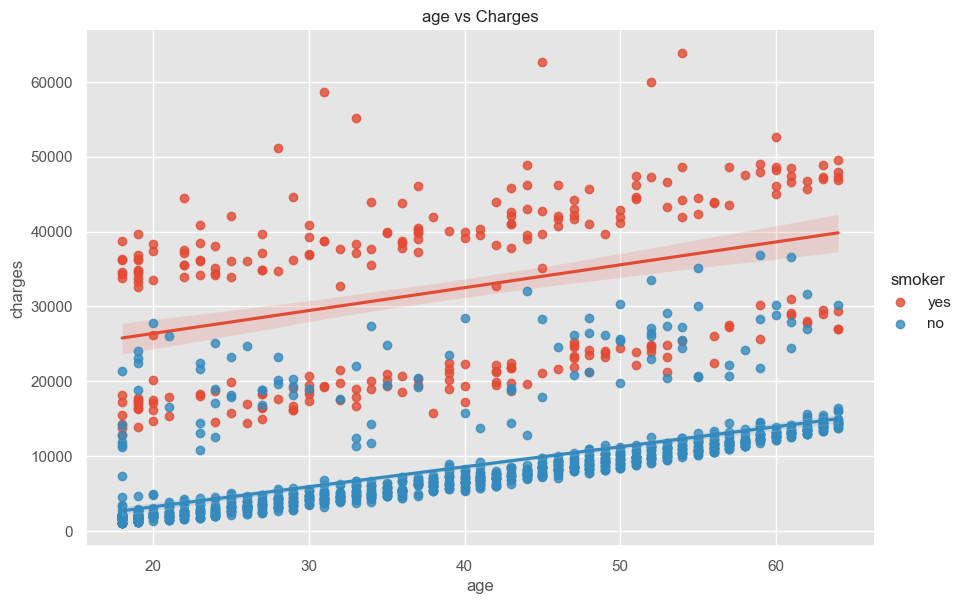

In [27]:
pop = ['bmi','children','age']
for i  in pop:
    plt.figure(figsize=(12, 8))
    sns.lmplot(x = i, y = 'charges', data=df, hue='smoker', aspect=1.5, height=6)
    plt.title(f'{i} vs Charges')
    plt.show()



- Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

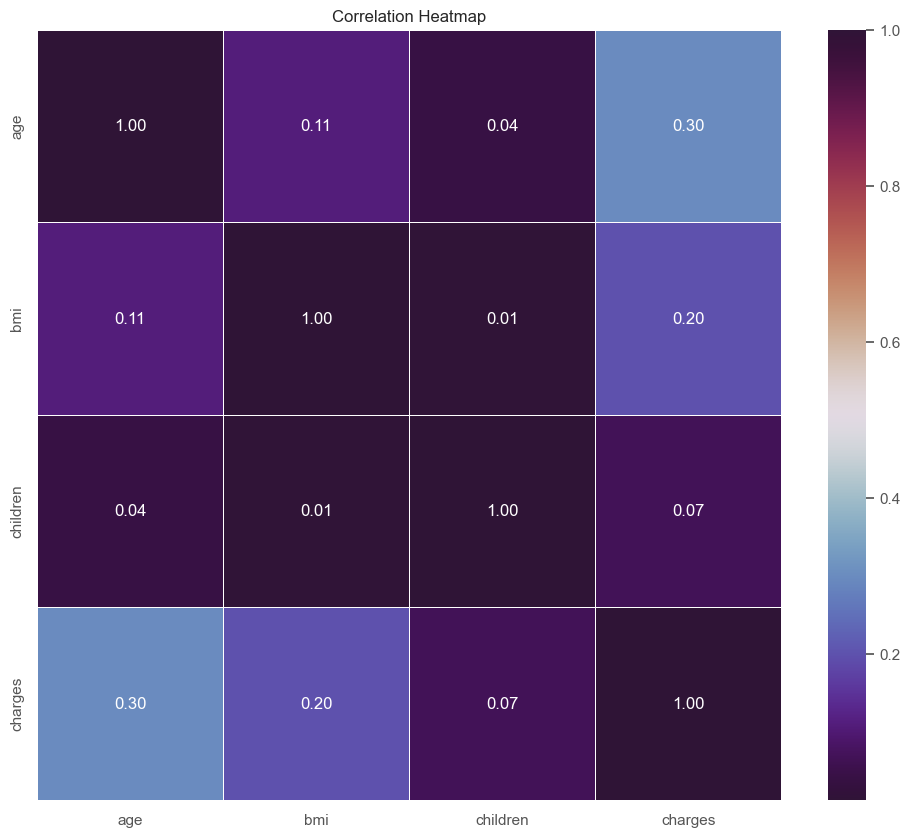

In [29]:
plt.figure(figsize=(12,10))

sns.heatmap(df.select_dtypes(include='number').corr(),linewidths=.5, fmt='.2f', annot=True, cmap='twilight_shifted')

plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [31]:
col=df.select_dtypes(include=object).columns
pd.DataFrame(col,columns=['String'])

,String
0,sex
1,smoker
2,region


In [32]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()
label=LabelEncoder()
for c in col:
    df2[c]=label.fit_transform(df2[c])

df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [33]:
features = [col for col in df2.columns if col not in ['charges']]
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [34]:
df2["mean"] = df2[features].mean(axis=1)
df2["std"] = df2[features].std(axis=1)
df2["min"] = df2[features].min(axis=1)
df2["max"] = df2[features].max(axis=1)
features.extend(['mean', 'std', 'min', 'max'])

df2.head()

,age,sex,bmi,children,smoker,region,charges,mean,std,min,max
0,19,0,27.900,0,1,3,16884.92400,8.483333,11.980053,0.0,27.90
1,18,1,33.770,1,0,2,1725.55230,9.295000,13.798773,0.0,33.77
2,28,1,33.000,3,0,2,4449.46200,11.166667,15.091940,0.0,33.00
3,33,1,22.705,0,0,1,21984.47061,9.617500,14.501994,0.0,33.00
4,32,1,28.880,0,0,1,3866.85520,10.480000,15.498852,0.0,32.00


## Split the data into Feature and Target variables

In [36]:
X = df2.drop('charges', axis=1)
y = df2.charges
X.head()

,age,sex,bmi,children,smoker,region,mean,std,min,max
0,19,0,27.900,0,1,3,8.483333,11.980053,0.0,27.90
1,18,1,33.770,1,0,2,9.295000,13.798773,0.0,33.77
2,28,1,33.000,3,0,2,11.166667,15.091940,0.0,33.00
3,33,1,22.705,0,0,1,9.617500,14.501994,0.0,33.00
4,32,1,28.880,0,0,1,10.480000,15.498852,0.0,32.00


## Spliting Data into Training and Testing data

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=12,shuffle=True)


---
---

<font size="+3" color='#053c96'><b> Data Modelling and Evaluation </b> </font>

---
---

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [41]:
def kfolds(model, model_name):
    model = cross_val_score(model, X, y, cv=10) 
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {round(model_score * 100,2)}%")
    df_kfolds = pd.DataFrame(data=model,columns=['Accuracy for atch fold'])
    df_kfolds['Accuracy for atch fold'] = df_kfolds['Accuracy for atch fold'].apply('{:.2%}'.format)
    return df_kfolds


def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"""{model_name} model score on Training data: {round(model_train_score * 100,2)}%
{model_name} model score on Testing data: {round(model_test_score * 100,2)}%""")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {round(score * 100,2)}%")

def MAEvalue(metrics, metrics_name, model):
    MAEvalue = metrics(y_test, model.predict(X_test), multioutput='uniform_average')
    print(f"{metrics_name} is : {MAEvalue}")

def MSEValue(metrics, metrics_name, model):
    MAEvalue = metrics(y_test, model.predict(X_test), multioutput='uniform_average')
    print(f"{metrics_name} is : {MAEvalue}")



def plot_Ytest_vs_Ypred(model, model_name, X_test, y_test):

    y_test_values = y_test[:300].values
    y_pred_values = model.predict(X_test[:300])
    
   
    x_bar = list(range(1, len(y_test_values) + 1))
    
    plt.figure(figsize=(18, 12))

    
    sns.scatterplot(x=x_bar, y=y_test_values, color="red", marker="o", label="y_test")
    
 
    sns.scatterplot(x=x_bar, y=y_pred_values, color="green", marker="x", label="y_pred")
    
    
    for i in range(len(x_bar)):
        plt.plot([x_bar[i], x_bar[i]], [y_test_values[i], y_pred_values[i]], color="blue",
                 linestyle="--", linewidth=1)
   
    plt.title(f'Show y_test vs y_pred\n '   
     f' Model {model_name} ')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()





## Random Forest Regressor


In [43]:
RF_model = RandomForestRegressor(n_estimators= 100, max_depth=5, random_state= 12)
Model_name = "Random Forest Regressor"
kfolds(RF_model, Model_name)
train(RF_model, Model_name)
r2(RF_model, Model_name)
MAEvalue(mean_absolute_error, "Mean Absolute Error Value", RF_model)
MSEValue(mean_squared_error, "Mean Squared Error Value", RF_model)

Random Forest Regressor score on cross validation: 85.61%
Random Forest Regressor model score on Training data: 90.68%
Random Forest Regressor model score on Testing data: 84.32%
R2 Score for Random Forest Regressor is 84.32%
Mean Absolute Error Value is : 2719.8782945318108
Mean Squared Error Value is : 26252050.45731258


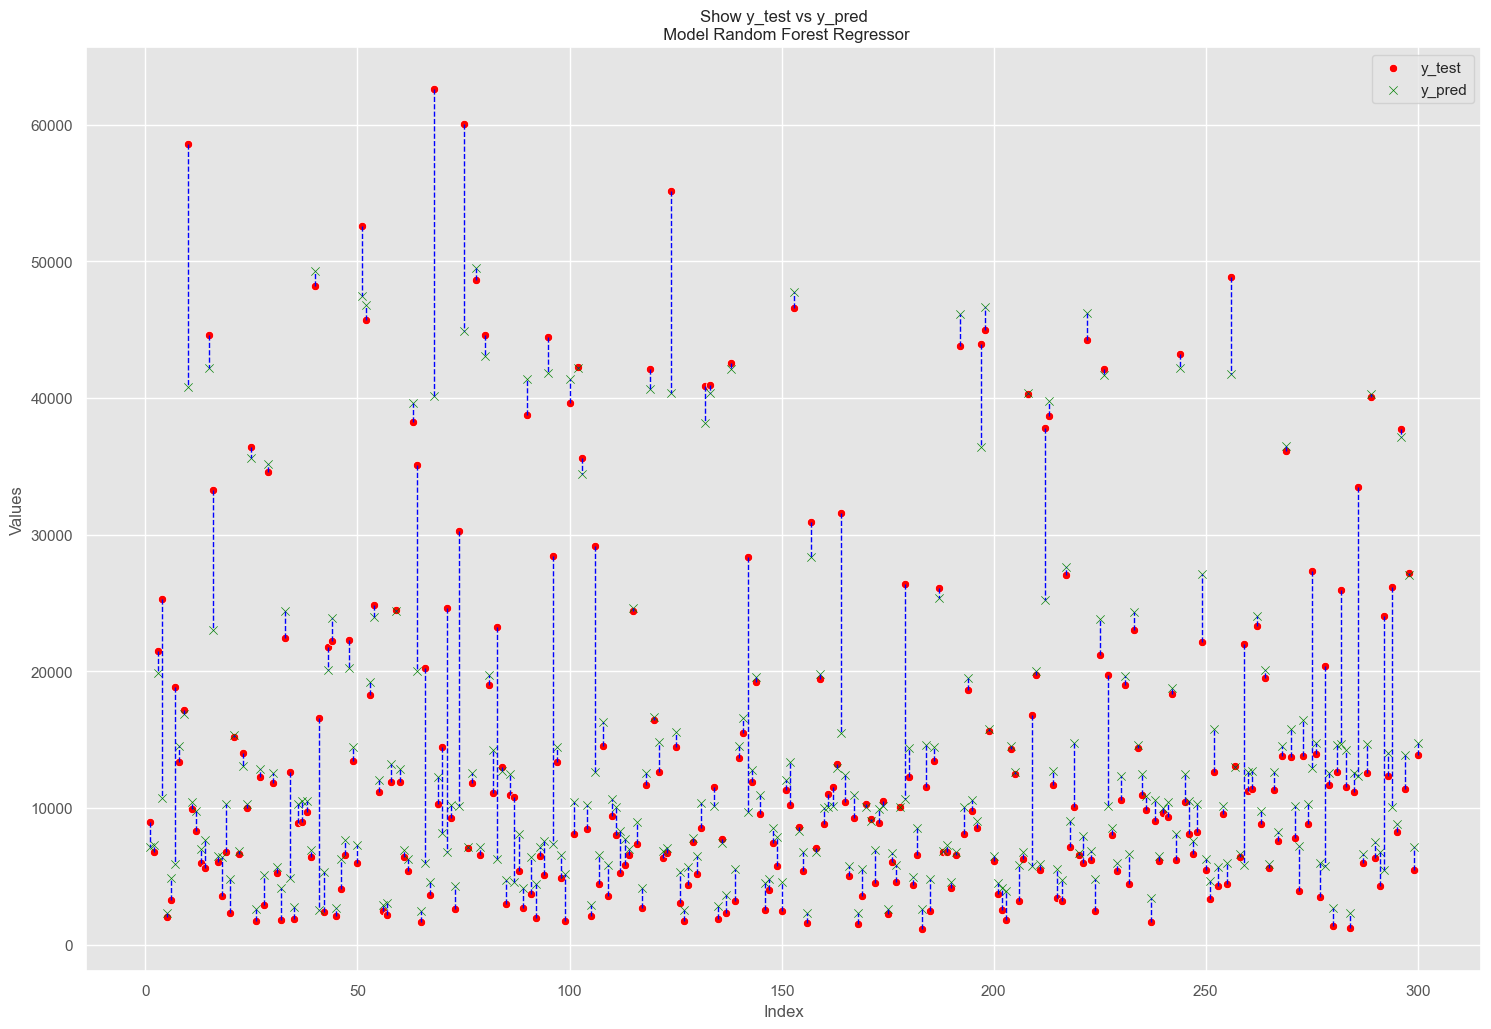

In [44]:
plot_Ytest_vs_Ypred(RF_model, Model_name, X_test, y_test)

## Bagging Regressor


In [46]:
BAG = BaggingRegressor(n_estimators=120,  random_state=12)
Model_name = "Bagging Regressor"

kfolds(BAG,Model_name)
train(BAG, Model_name)
r2(BAG, Model_name)
MAEvalue(mean_absolute_error, "Mean Absolute Error Value", BAG)
MSEValue(mean_squared_error, "Mean Squared Error Value", BAG)

Bagging Regressor score on cross validation: 83.97%
Bagging Regressor model score on Training data: 97.81%
Bagging Regressor model score on Testing data: 84.46%
R2 Score for Bagging Regressor is 84.46%
Mean Absolute Error Value is : 2649.6784826014964
Mean Squared Error Value is : 26008380.34821576


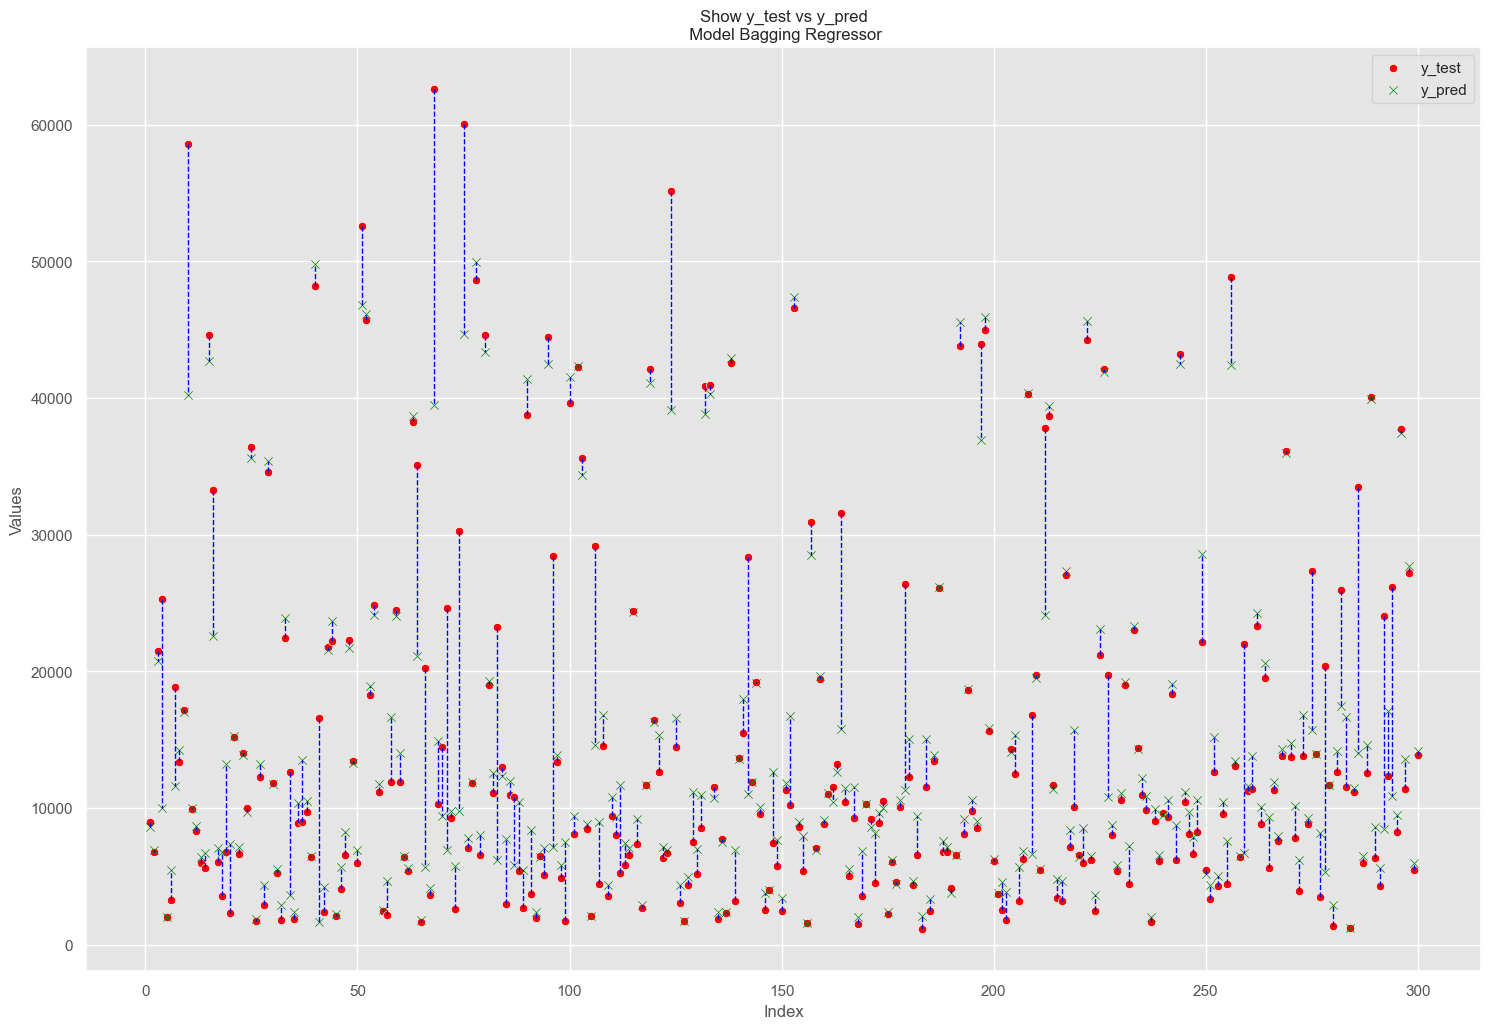

In [47]:
plot_Ytest_vs_Ypred(BAG, Model_name, X_test, y_test)


## Gradient Boosting Regressor

In [49]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4, 
                               random_state=12)
Model_name = "Gradient Boosting Regressor"
kfolds(GBR,Model_name)
train(GBR, Model_name)
r2(GBR, Model_name)
MAEvalue(mean_absolute_error, "Mean Absolute Error Value", GBR)
MSEValue(mean_squared_error, "Mean Squared Error Value", GBR)

Gradient Boosting Regressor score on cross validation: 84.71%
Gradient Boosting Regressor model score on Training data: 95.7%
Gradient Boosting Regressor model score on Testing data: 83.22%
R2 Score for Gradient Boosting Regressor is 83.22%
Mean Absolute Error Value is : 2690.7844603745793
Mean Squared Error Value is : 28085488.130334318


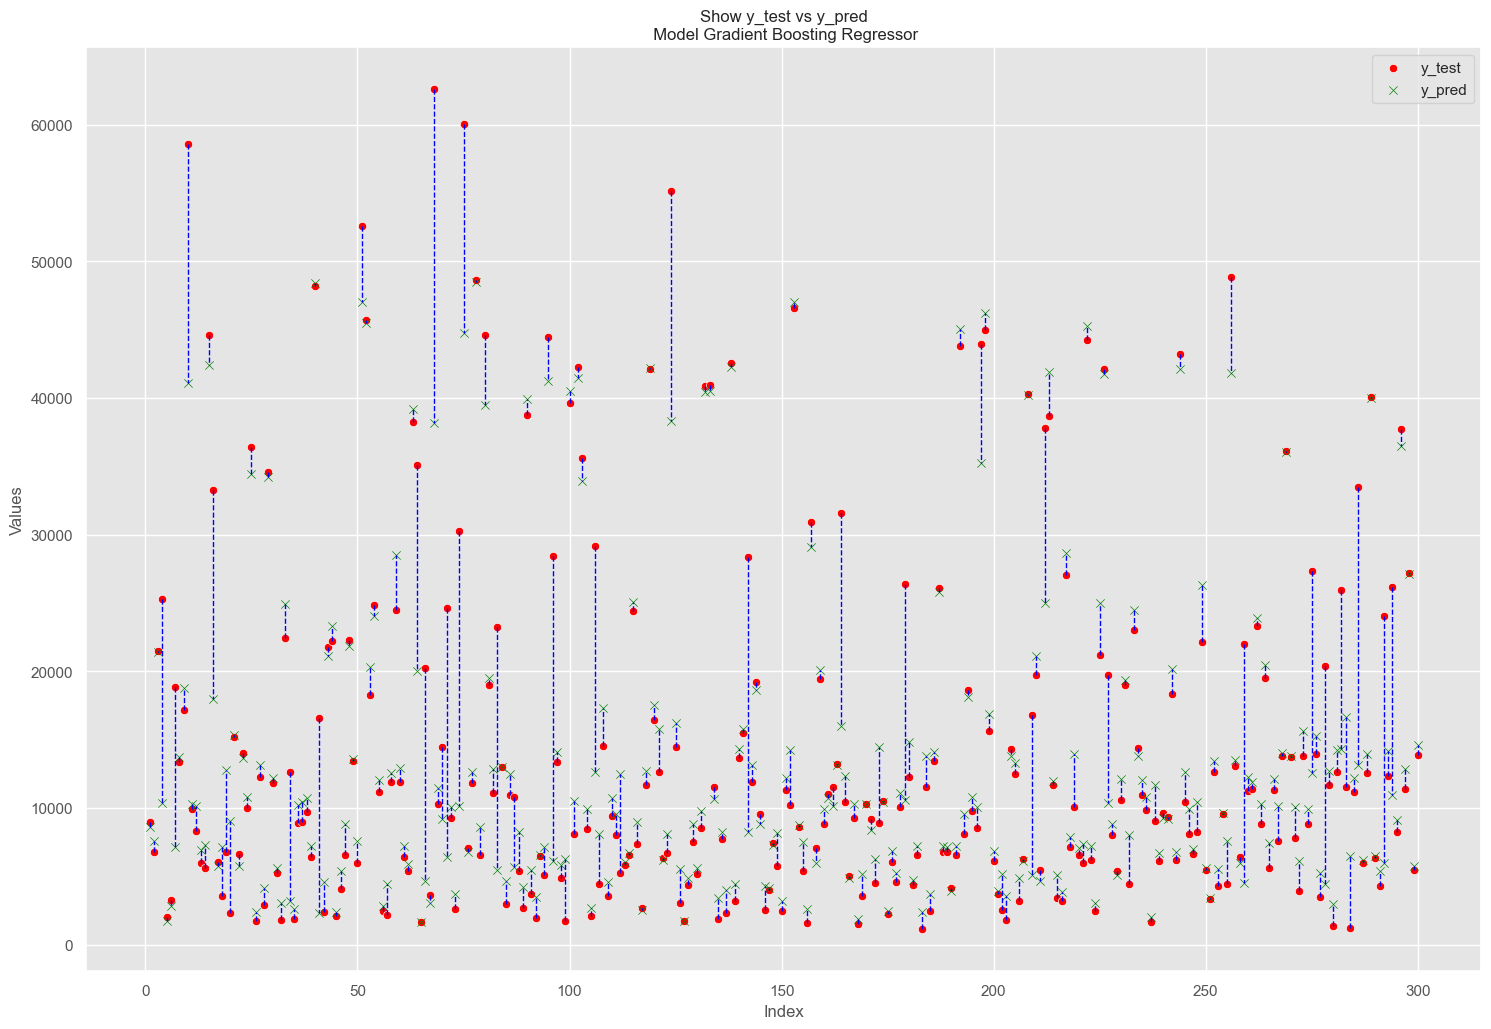

In [50]:
plot_Ytest_vs_Ypred(GBR, Model_name, X_test, y_test)

## Decision Tree Regressor

In [52]:
DTR = DecisionTreeRegressor(max_depth=5 ,criterion='squared_error', random_state=12)
Model_name = "Decision Tree Regressor"
kfolds(DTR,Model_name)
train(DTR, Model_name)
r2(DTR, Model_name)
MAEvalue(mean_absolute_error, "Mean Absolute Error Value", DTR)
MSEValue(mean_squared_error, "Mean Squared Error Value", DTR)

Decision Tree Regressor score on cross validation: 83.61%
Decision Tree Regressor model score on Training data: 89.84%
Decision Tree Regressor model score on Testing data: 83.15%
R2 Score for Decision Tree Regressor is 83.15%
Mean Absolute Error Value is : 2887.9259148862225
Mean Squared Error Value is : 28198625.350914866


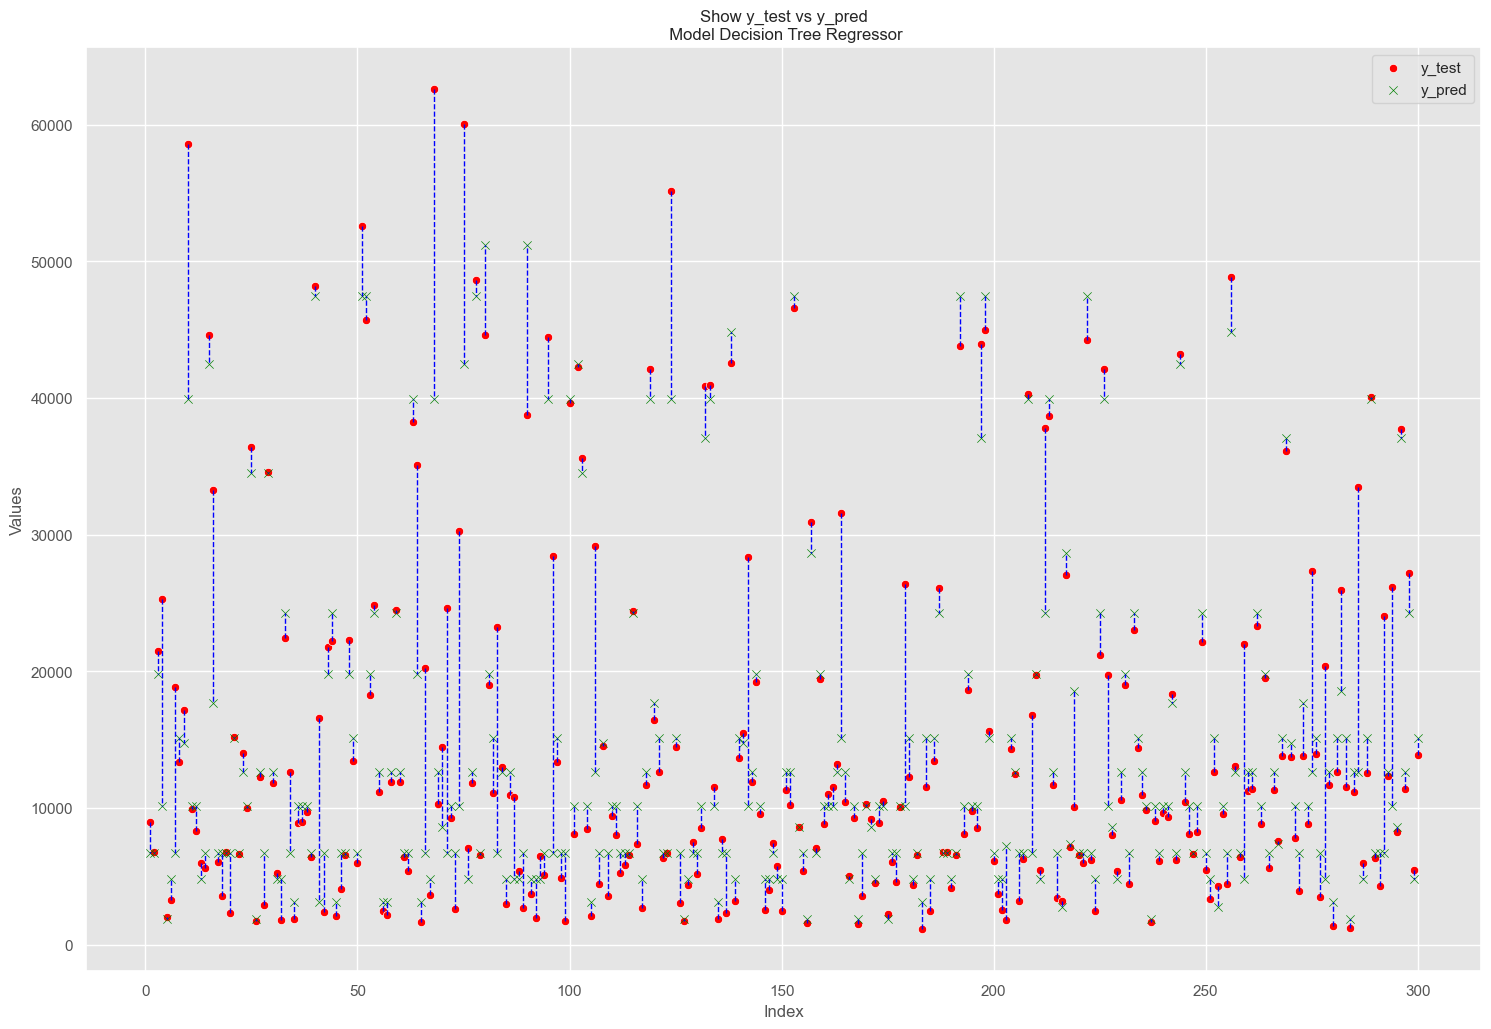

In [53]:
plot_Ytest_vs_Ypred(DTR, Model_name, X_test, y_test)

## XgBoost Regressor

In [55]:
XGB = XGBRegressor()
Model_name = "XgBoost Regressor"
kfolds(XGB,Model_name)
train(XGB, Model_name)
r2(XGB, Model_name)
MAEvalue(mean_absolute_error, "Mean Absolute Error Value", XGB)
MSEValue(mean_squared_error, "Mean Squared Error Value", XGB)

XgBoost Regressor score on cross validation: 81.84%
XgBoost Regressor model score on Training data: 99.72%
XgBoost Regressor model score on Testing data: 81.26%
R2 Score for XgBoost Regressor is 81.26%
Mean Absolute Error Value is : 3007.6191872432073
Mean Squared Error Value is : 31377594.967574243


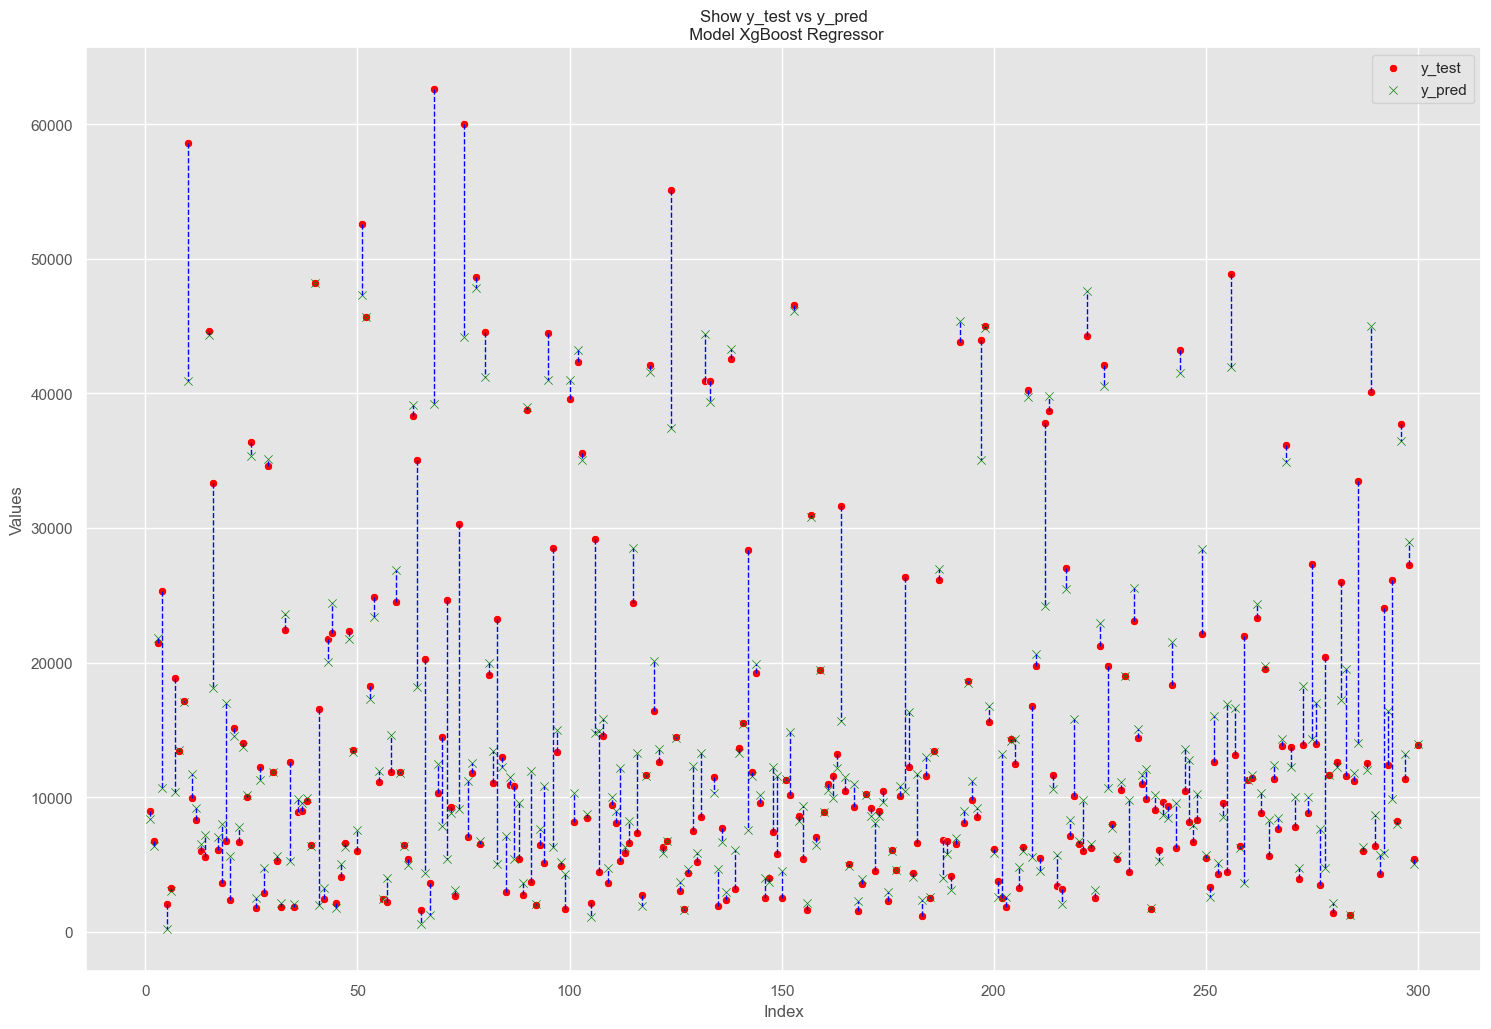

In [56]:
plot_Ytest_vs_Ypred(XGB, Model_name, X_test, y_test)


## Display Feature Importances

Text(0, 0.5, 'Feature')

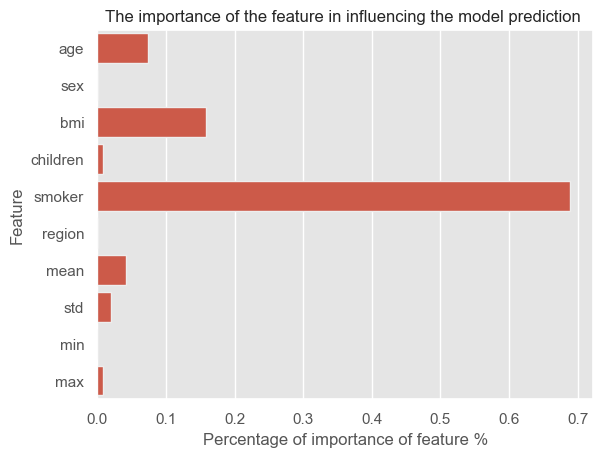

In [58]:
sns.barplot(y=X.keys(),x=RF_model.feature_importances_)
plt.title(f'The importance of the feature in influencing the model prediction\n
                   Useing Random Forest')
plt.xlabel('Percentage of importance of feature %')
plt.ylabel('Feature')